In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from scipy.spatial import Voronoi, voronoi_plot_2d

from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
SEED = 42 
#np.random.seed(SEED)

### Create datapoint sample

In [123]:
num_classes = 3
samples_per_class = 150

X, y = make_blobs(n_samples = num_classes * samples_per_class, 
                  centers = num_classes, 
                  cluster_std = 1.1, 
                  random_state = SEED)
df = pd.DataFrame(X, columns=['x', 'y'])
df['class'] = y

### Visualization

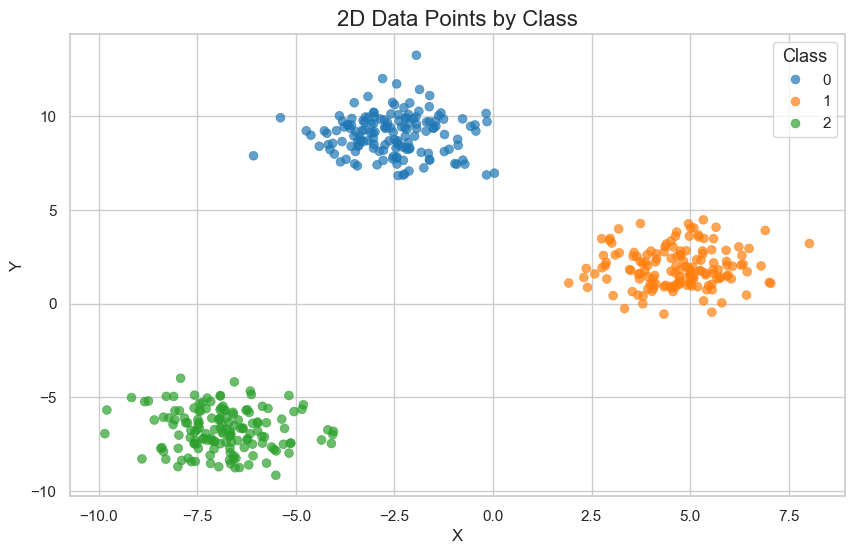

In [124]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plot = sns.scatterplot(data=df, x='x', y='y', hue='class', palette='tab10', s=40, alpha=0.7, edgecolor=None)

plot.set_title('2D Data Points by Class', fontsize=16)
plot.set_xlabel('X', fontsize=12)
plot.set_ylabel('Y', fontsize=12)
plot.legend(title='Class', title_fontsize='13', fontsize='11')

plt.show()

### Randomly Create Sample for clustering

#### Sample test

In [125]:
#np.random.seed(10)
outlier_x = np.random.uniform(low=df['x'].min() , high=df['x'].max())
outlier_y = np.random.uniform(low=df['y'].min() , high=df['y'].max() )
outlier_df = pd.DataFrame({'x': [outlier_x], 'y': [outlier_y], 'class': ['outlier']})

outlier_df.to_numpy()[0][0]

0.8974360738467961

#### Function Building

In [126]:
def create_sample(df: pd.DataFrame)->tuple[float, float]:
    outlier_x = np.random.uniform(low= df['x'].min()+ 10 , high=df['x'].max() + 10)
    outlier_y = np.random.uniform(low=df['y'].min()+ 10  , high=df['y'].max() +10 )
    outlier_df = pd.DataFrame({'x': [outlier_x], 'y': [outlier_y], 'class': ['outlier']})

    
    return (outlier_df.to_numpy()[0][0],outlier_df.to_numpy()[0][1])

#### Visualize randomly point

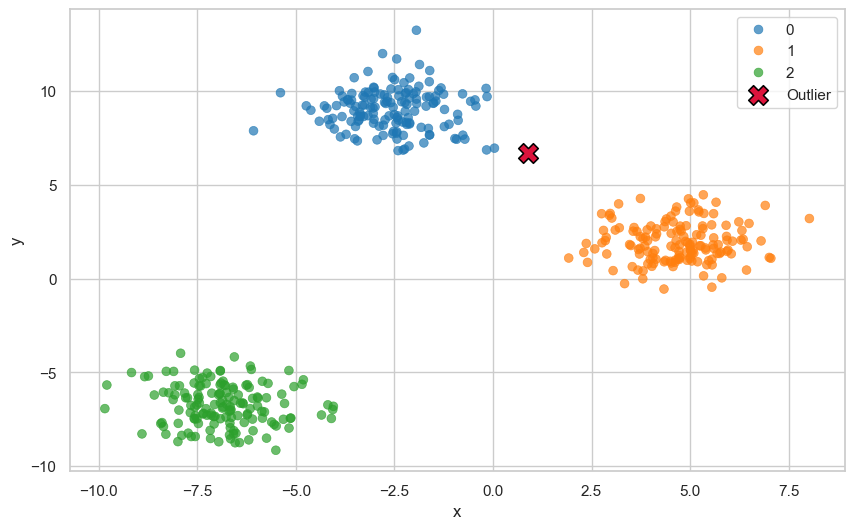

In [127]:
df_combined = pd.concat([df, outlier_df], ignore_index=True)
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.scatterplot(data=df, x='x', y='y', hue='class', palette='tab10', s=40, alpha=0.7, edgecolor=None)
sns.scatterplot(data=df_combined[df_combined['class'] == 'outlier'], x='x', y='y', color='crimson', s=200, 
                marker='X', label='Outlier', edgecolor='black')

plot.set_title('2D Data Points by Class', fontsize=16)
plot.set_xlabel('X', fontsize=12)
plot.set_ylabel('Y', fontsize=12)
plot.legend(title='Class', title_fontsize='13', fontsize='11')

plt.show()

#### Calculate Distance (Euclien Distance)

In [128]:
x_point = df.to_numpy()[:, 0]
y_point = df.to_numpy()[:, 1]
class_point = df.to_numpy()[:, 2].astype(np.uint8)
class_point

array([0, 1, 1, 1, 1, 0, 1, 0, 2, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 2,
       0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 1, 0, 0, 1,
       1, 0, 0, 2, 2, 2, 2, 1, 2, 0, 0, 2, 1, 0, 1, 0, 1, 0, 1, 2, 0, 0,
       2, 1, 0, 2, 1, 1, 1, 0, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       1, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 1, 2, 0, 0, 1, 1, 0, 0, 1, 1, 2,
       0, 0, 1, 2, 0, 0, 1, 2, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 2, 2, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 2, 2, 2, 1, 2, 0, 0, 1, 1, 0, 1, 0, 1, 2, 0, 1, 2, 2, 0, 0,
       2, 2, 1, 2, 2, 1, 2, 1, 1, 0, 0, 0, 2, 1, 1, 2, 2, 1, 1, 1, 0, 0,
       2, 0, 0, 1, 1, 1, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0,
       0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 1, 0, 2, 0, 2, 0,
       0, 2, 2, 1, 2, 2, 0, 2, 1, 1, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0,
       2, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 1, 1, 0, 2,

In [129]:
outlier_df

,x,y,class
0,0.897436,6.709284,outlier


In [130]:
p_sample_x = outlier_df.loc[0,'x']
p_sample_y = outlier_df.loc[0,'y']
print(f'point_x: {p_sample_x} | point_y: {p_sample_y}')

point_x: 0.8974360738467961 | point_y: 6.709283615350309


#### Find out distances and sorting

In [131]:
distance_matrix = np.sqrt((x_point-p_sample_x)**2 + (y_point-p_sample_y)**2)
distance_matrix_sorted = np.sort(distance_matrix)
distance_matrix_sorted

array([ 0.89637193,  1.07196122,  1.76942382,  1.91110136,  1.96043841,
        2.01369644,  2.48629847,  2.52640052,  2.55195924,  2.68044067,
        2.68578883,  2.70439304,  2.72942241,  2.83001207,  2.85236835,
        3.04057436,  3.05064723,  3.11613643,  3.13394182,  3.1448112 ,
        3.1468623 ,  3.18006428,  3.18039311,  3.30601184,  3.30782644,
        3.38584281,  3.40562628,  3.41304746,  3.43811572,  3.49560831,
        3.50296321,  3.51875587,  3.55690396,  3.5643468 ,  3.58160076,
        3.58372338,  3.58698703,  3.58739843,  3.59249963,  3.59834391,
        3.60392292,  3.60688215,  3.6222167 ,  3.64411197,  3.71330536,
        3.73322264,  3.74088326,  3.74245498,  3.79877669,  3.80061599,
        3.8244822 ,  3.83225815,  3.83371966,  3.84162202,  3.8557604 ,
        3.86636964,  3.90039675,  3.91128546,  3.9135717 ,  3.94198274,
        3.96173666,  3.96949532,  4.0263214 ,  4.03105284,  4.03782095,
        4.04035549,  4.04218715,  4.04770479,  4.07109606,  4.11

In [132]:
print(distance_matrix)

[ 4.46762925  5.29318318  7.34262007  6.27639454  5.57609272  3.49560831
  5.58797754  3.8557604  15.49582622  5.05439354  1.07196122  5.35093815
  5.86805933  6.02528358  6.62200663  4.89612437  5.41701754  6.82059068
  4.96056685  5.63938544  5.95502118 15.38072734  5.29441088  2.68578883
 13.62025034  6.15536714 15.40769555 14.58226246 15.13083861 16.14657699
 14.78019434 17.13343841 14.59248615  5.19011344  5.95064381 15.95722278
  4.59718574 14.43674943  3.71330536  2.70439304 14.3154704   5.18683861
  6.80448474  4.84290308  5.61017185  3.18039311  3.94198274  4.04770479
 13.52649988  6.65609148  4.92573868 14.3771838   4.55628213  6.86834345
 15.36056963 15.96237581  7.22539856  6.48466408 15.83823863  7.07087478
  6.33397544 16.53076165  8.27539849  3.60392292  4.55309096  5.71052921
  6.70755905  5.96642846  5.29950694 15.69742007 16.39311944 17.79041236
 16.87931124  6.10868294 15.21590296  4.60548233  3.83371966 14.73011724
  5.40910867  4.5374179   6.64178397  3.58372338  5

In [139]:
top_k = 50
k_indice = [np.where(distance_matrix == element)[0][0] for element in distance_matrix_sorted[0:top_k]]
print(f'k_indicate: {k_indice}')

k_indicate: [209, 10, 231, 147, 136, 232, 389, 208, 396, 364, 23, 39, 348, 243, 395, 307, 415, 283, 305, 398, 391, 189, 45, 218, 431, 351, 316, 331, 384, 5, 222, 270, 287, 137, 239, 81, 249, 306, 234, 184, 63, 261, 302, 83, 38, 165, 429, 216, 132, 381]


In [140]:
print(f'Class belong to: {class_point[k_indice]}')

Class belong to: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0]


In [141]:
set_indice = set(class_point[k_indice])
print(f'set indicate: {set_indice}')
repeat = [list(class_point[k_indice]).count(x) for x in set_indice]
print(f'repeat: {repeat}')

set indicate: {0, 1}
repeat: [47, 3]


In [136]:
indice_max = np.array(repeat).argmax()
print(f'max indicator: {indice_max}')
print(f'class belong to: {(list(set_indice))[indice_max]}')

max indicator: 0
class belong to: 0
